In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataframe creation


In [ ]:
data = pd.read_csv("data.csv")
data.head(4)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0

EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), int64(1

In [ ]:
#count for the failure type
print(data['TWF'].value_counts())   #tool wear failue
print(data['HDF'].value_counts())   #heat dispation faliure
print(data['PWF'].value_counts())   #power failure
print(data['OSF'].value_counts())   #overstrain failure
print(data['RNF'].value_counts())   #random failures

0    9954
1      46
Name: TWF, dtype: int64
0    9885
1     115
Name: HDF, dtype: int64
0    9905
1      95
Name: PWF, dtype: int64
0    9902
1      98
Name: OSF, dtype: int64
0    9981
1      19
Name: RNF, dtype: int64


In [ ]:
data.isnull().any()

UDI                        False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

In [ ]:
for column in data.columns:
    try:
        data[column]=data[column].astype(float)
    except:
        pass

In [ ]:
df_numeric = data.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

<ipython-input-8-435a69df5569>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


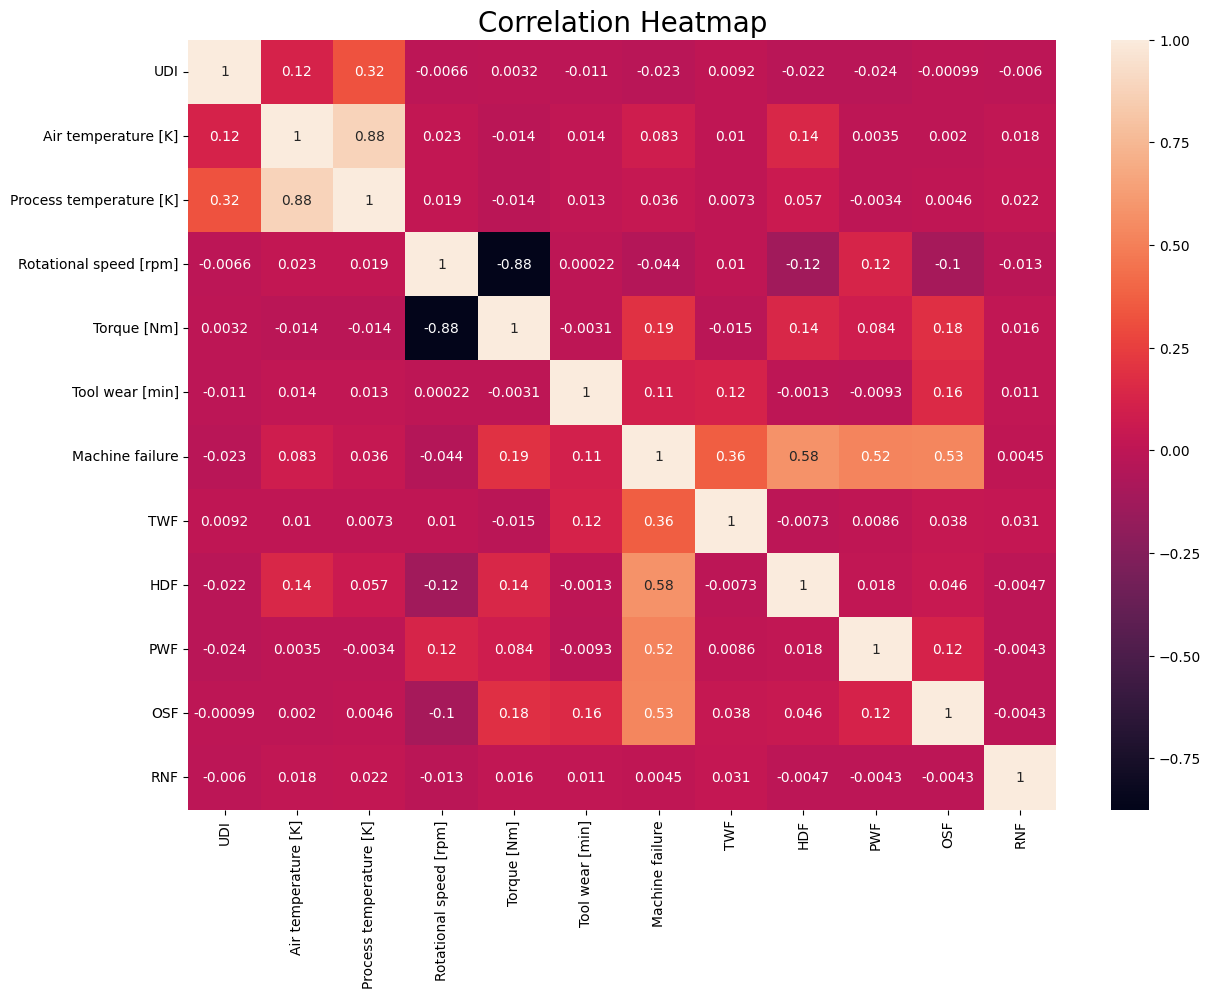

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=20)
plt.show()

<ipython-input-9-8bc825395280>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cluster2 = data.corr()


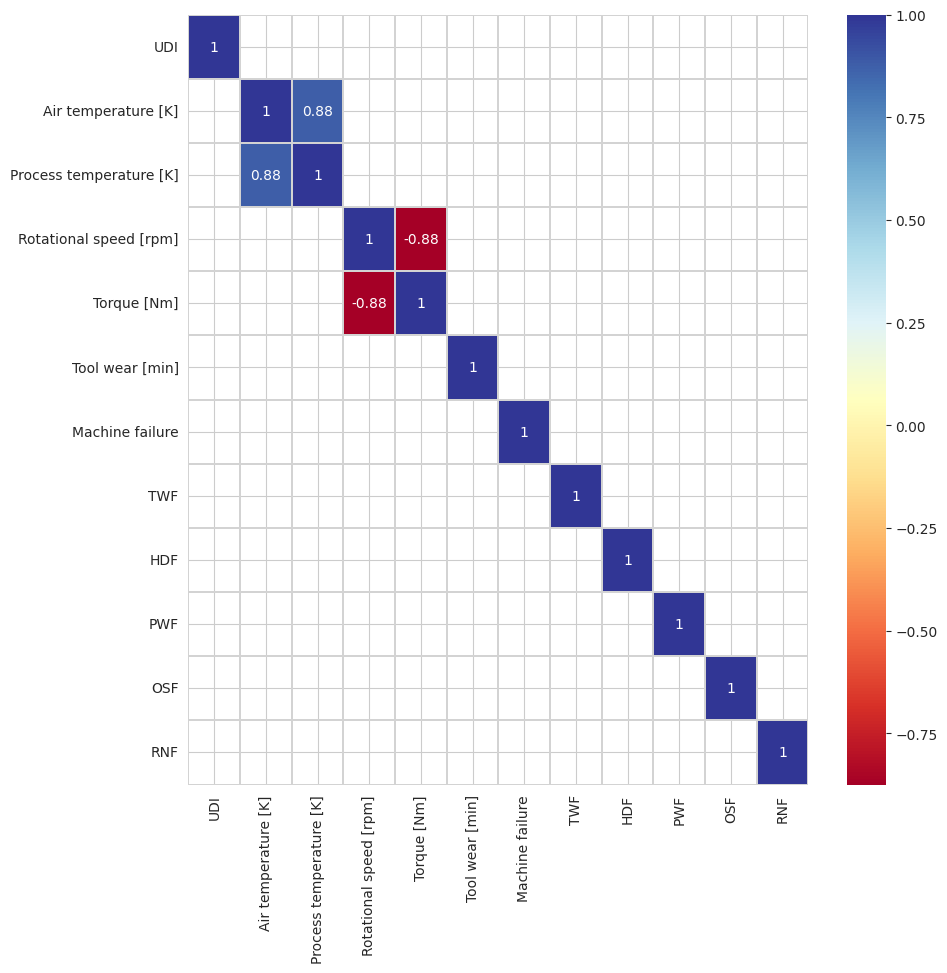

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

data cleaning and preprocessing

In [ ]:
data["Type"] = data["Type"].replace("L",0)
data["Type"] = data["Type"].replace("M",1)
data["Type"] = data["Type"].replace("H",2)

In [ ]:
data.head()

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0  1.0     M14860     1                298.1                    308.6   
1  2.0     L47181     0                298.2                    308.7   
2  3.0     L47182     0                298.1                    308.5   
3  4.0     L47183     0                298.2                    308.6   
4  5.0     L47184     0                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                  1551.0         42.8              0.0              0.0  0.0   
1                  1408.0         46.3              3.0              0.0  0.0   
2                  1498.0         49.4              5.0              0.0  0.0   
3                  1433.0         39.5              7.0              0.0  0.0   
4                  1408.0         40.0              9.0              0.0  0.0   

   HDF  PWF  OSF  RNF  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0

In [ ]:
data.shape

(10000, 14)

In [ ]:
remove = ['UDI','Product ID','TWF','HDF','PWF','OSF','RNF']
df = data.drop(remove, axis =1)
df.head(1)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                  1551.0   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         42.8              0.0              0.0

In [ ]:
data.head(1)

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0  1.0     M14860     1                298.1                    308.6   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                  1551.0         42.8              0.0              0.0  0.0   

   HDF  PWF  OSF  RNF  
0  0.0  0.0  0.0  0.0

In [ ]:
df.describe(include='all')

Type  Air temperature [K]  Process temperature [K]  \
count  10000.000000         10000.000000             10000.000000   
mean       0.500300           300.004930               310.005560   
std        0.671301             2.000259                 1.483734   
min        0.000000           295.300000               305.700000   
25%        0.000000           298.300000               308.800000   
50%        0.000000           300.100000               310.100000   
75%        1.000000           301.500000               311.100000   
max        2.000000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  
count            10000.000000  10000.000000     10000.000000     10000.000000  
mean              1538.776100     39.986910       107.951000         0.033900  
std                179.284096      9.968934        63.654147         0.180981  
min               1168.000000      3.800000         0.000000         0.000000  
25%               1423.000000     33.200000        53.000000         0.000000  
50%               1503.000000     40.100000       108.000000         0.000000  
75%               1612.000000     46.800000       162.000000         0.000000  
max               2886.000000     76.600000       253.000000         1.000000

In [ ]:
data['Machine failure'].value_counts()  #number of times the machine is failed is denoted by 1 and not by 0

0.0    9661
1.0     339
Name: Machine failure, dtype: int64

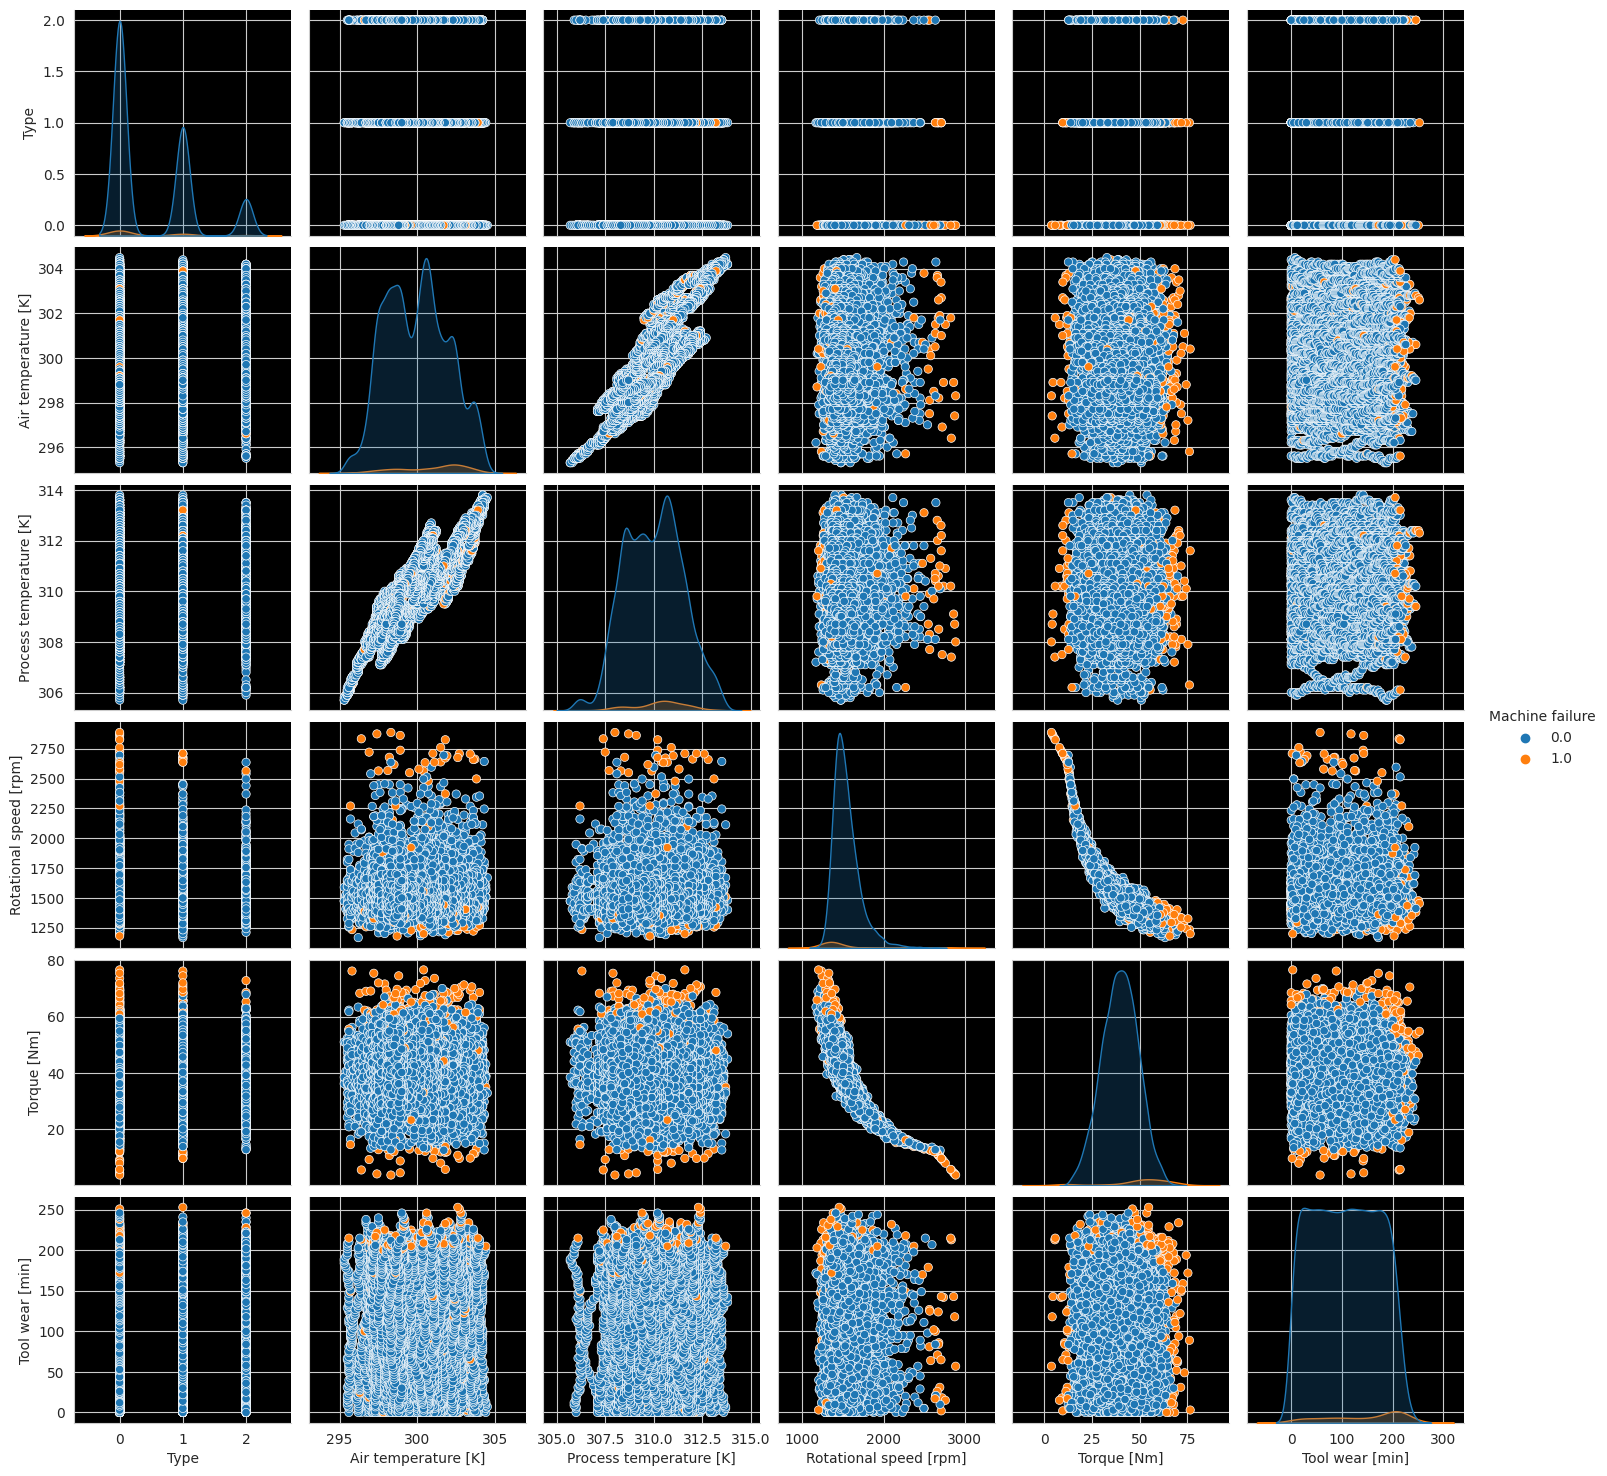

In [ ]:
sns.pairplot(df, hue = 'Machine failure')

Data frame Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_feature = scaler.transform(df)
df_minmax = pd.DataFrame(data=scaled_feature,columns=df.columns[::])
df_minmax.head(1)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   0.5             0.304348                 0.358025                0.222934   

   Torque [Nm]  Tool wear [min]  Machine failure  
0     0.535714              0.0              0.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_feature = scaler.transform(df)
df_standard = pd.DataFrame(data=scaled_feature,columns=df.columns[::])
df_standard.head(1)

Type  Air temperature [K]  Process temperature [K]  \
0  0.744413            -0.952389                 -0.94736   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                0.068185       0.2822        -1.695984        -0.187322

Test and Train split


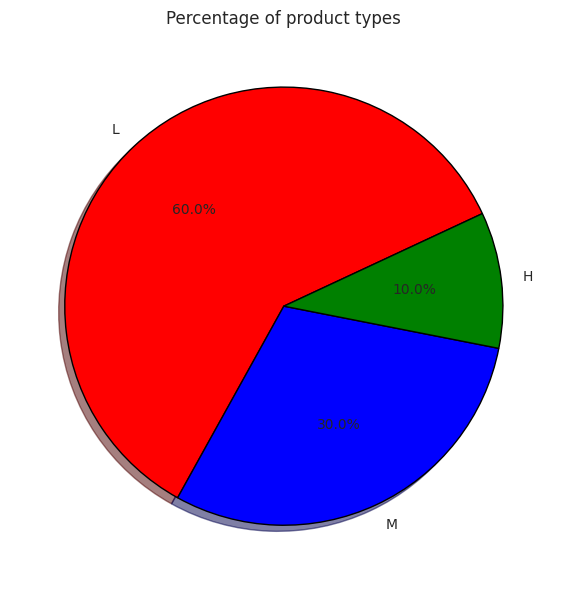

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
colors = ['RED', 'BLUE', 'GREEN']
plt.pie(df['Type'].value_counts(), labels=['L', 'M', 'H'], colors=colors,
    autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)

plt.title('Percentage of product types')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = df_minmax.drop(columns='Machine failure',axis=1)
y = df_minmax['Machine failure']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 6)
(7000,)
(3000, 6)
(3000,)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0.0    6758
1.0     242
Name: Machine failure, dtype: int64
0.0    2903
1.0      97
Name: Machine failure, dtype: int64


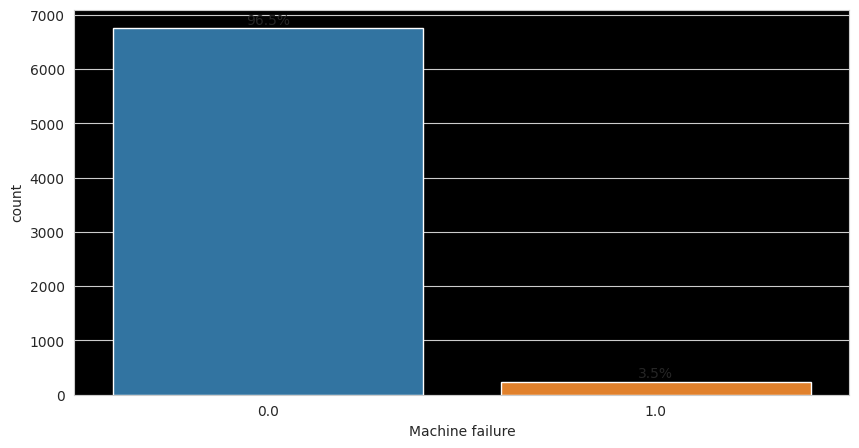

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

Training a DT-model without balancing dataset

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)



In [ ]:
X_train.head(1)

Type  Air temperature [K]  Process temperature [K]  \
4868   0.0             0.902174                  0.82716   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
4868                0.145518      0.57967         0.505929

In [ ]:
X_test.head()

Type  Air temperature [K]  Process temperature [K]  \
7330   1.0             0.489130                 0.555556   
2047   0.0             0.434783                 0.432099   
8241   0.5             0.391304                 0.555556   
4551   0.5             0.793478                 0.592593   
1157   0.0             0.184783                 0.259259   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
7330                0.214785     0.450549         0.754941  
2047                0.353318     0.280220         0.494071  
8241                0.541909     0.222527         0.387352  
4551                0.207218     0.410714         0.806324  
1157                0.241560     0.458791         0.747036

In [ ]:
y_test.head()

7330    0.0
2047    0.0
8241    0.0
4551    0.0
1157    0.0
Name: Machine failure, dtype: float64

In [ ]:
from sklearn import tree
text_representation = tree.export_text(decision)
print(text_representation)

|--- feature_4 <= 0.84
|   |--- feature_4 <= 0.13
|   |   |--- feature_5 <= 0.05
|   |   |   |--- feature_5 <= 0.03
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  0.03
|   |   |   |   |--- class: 0.0
|   |   |--- feature_5 >  0.05
|   |   |   |--- class: 1.0
|   |--- feature_4 >  0.13
|   |   |--- feature_3 <= 0.12
|   |   |   |--- feature_1 <= 0.68
|   |   |   |   |--- feature_5 <= 0.75
|   |   |   |   |   |--- feature_4 <= 0.80
|   |   |   |   |   |   |--- feature_5 <= 0.73
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_5 >  0.73
|   |   |   |   |   |   |   |--- feature_4 <= 0.78
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_4 >  0.78
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_4 >  0.80
|   |   |   |   |   |   |--- feature_1 <= 0.65
|   |   |   |   |   |   |   |--- feature_3 <= 0.11
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.81
|   |   |   |   |  

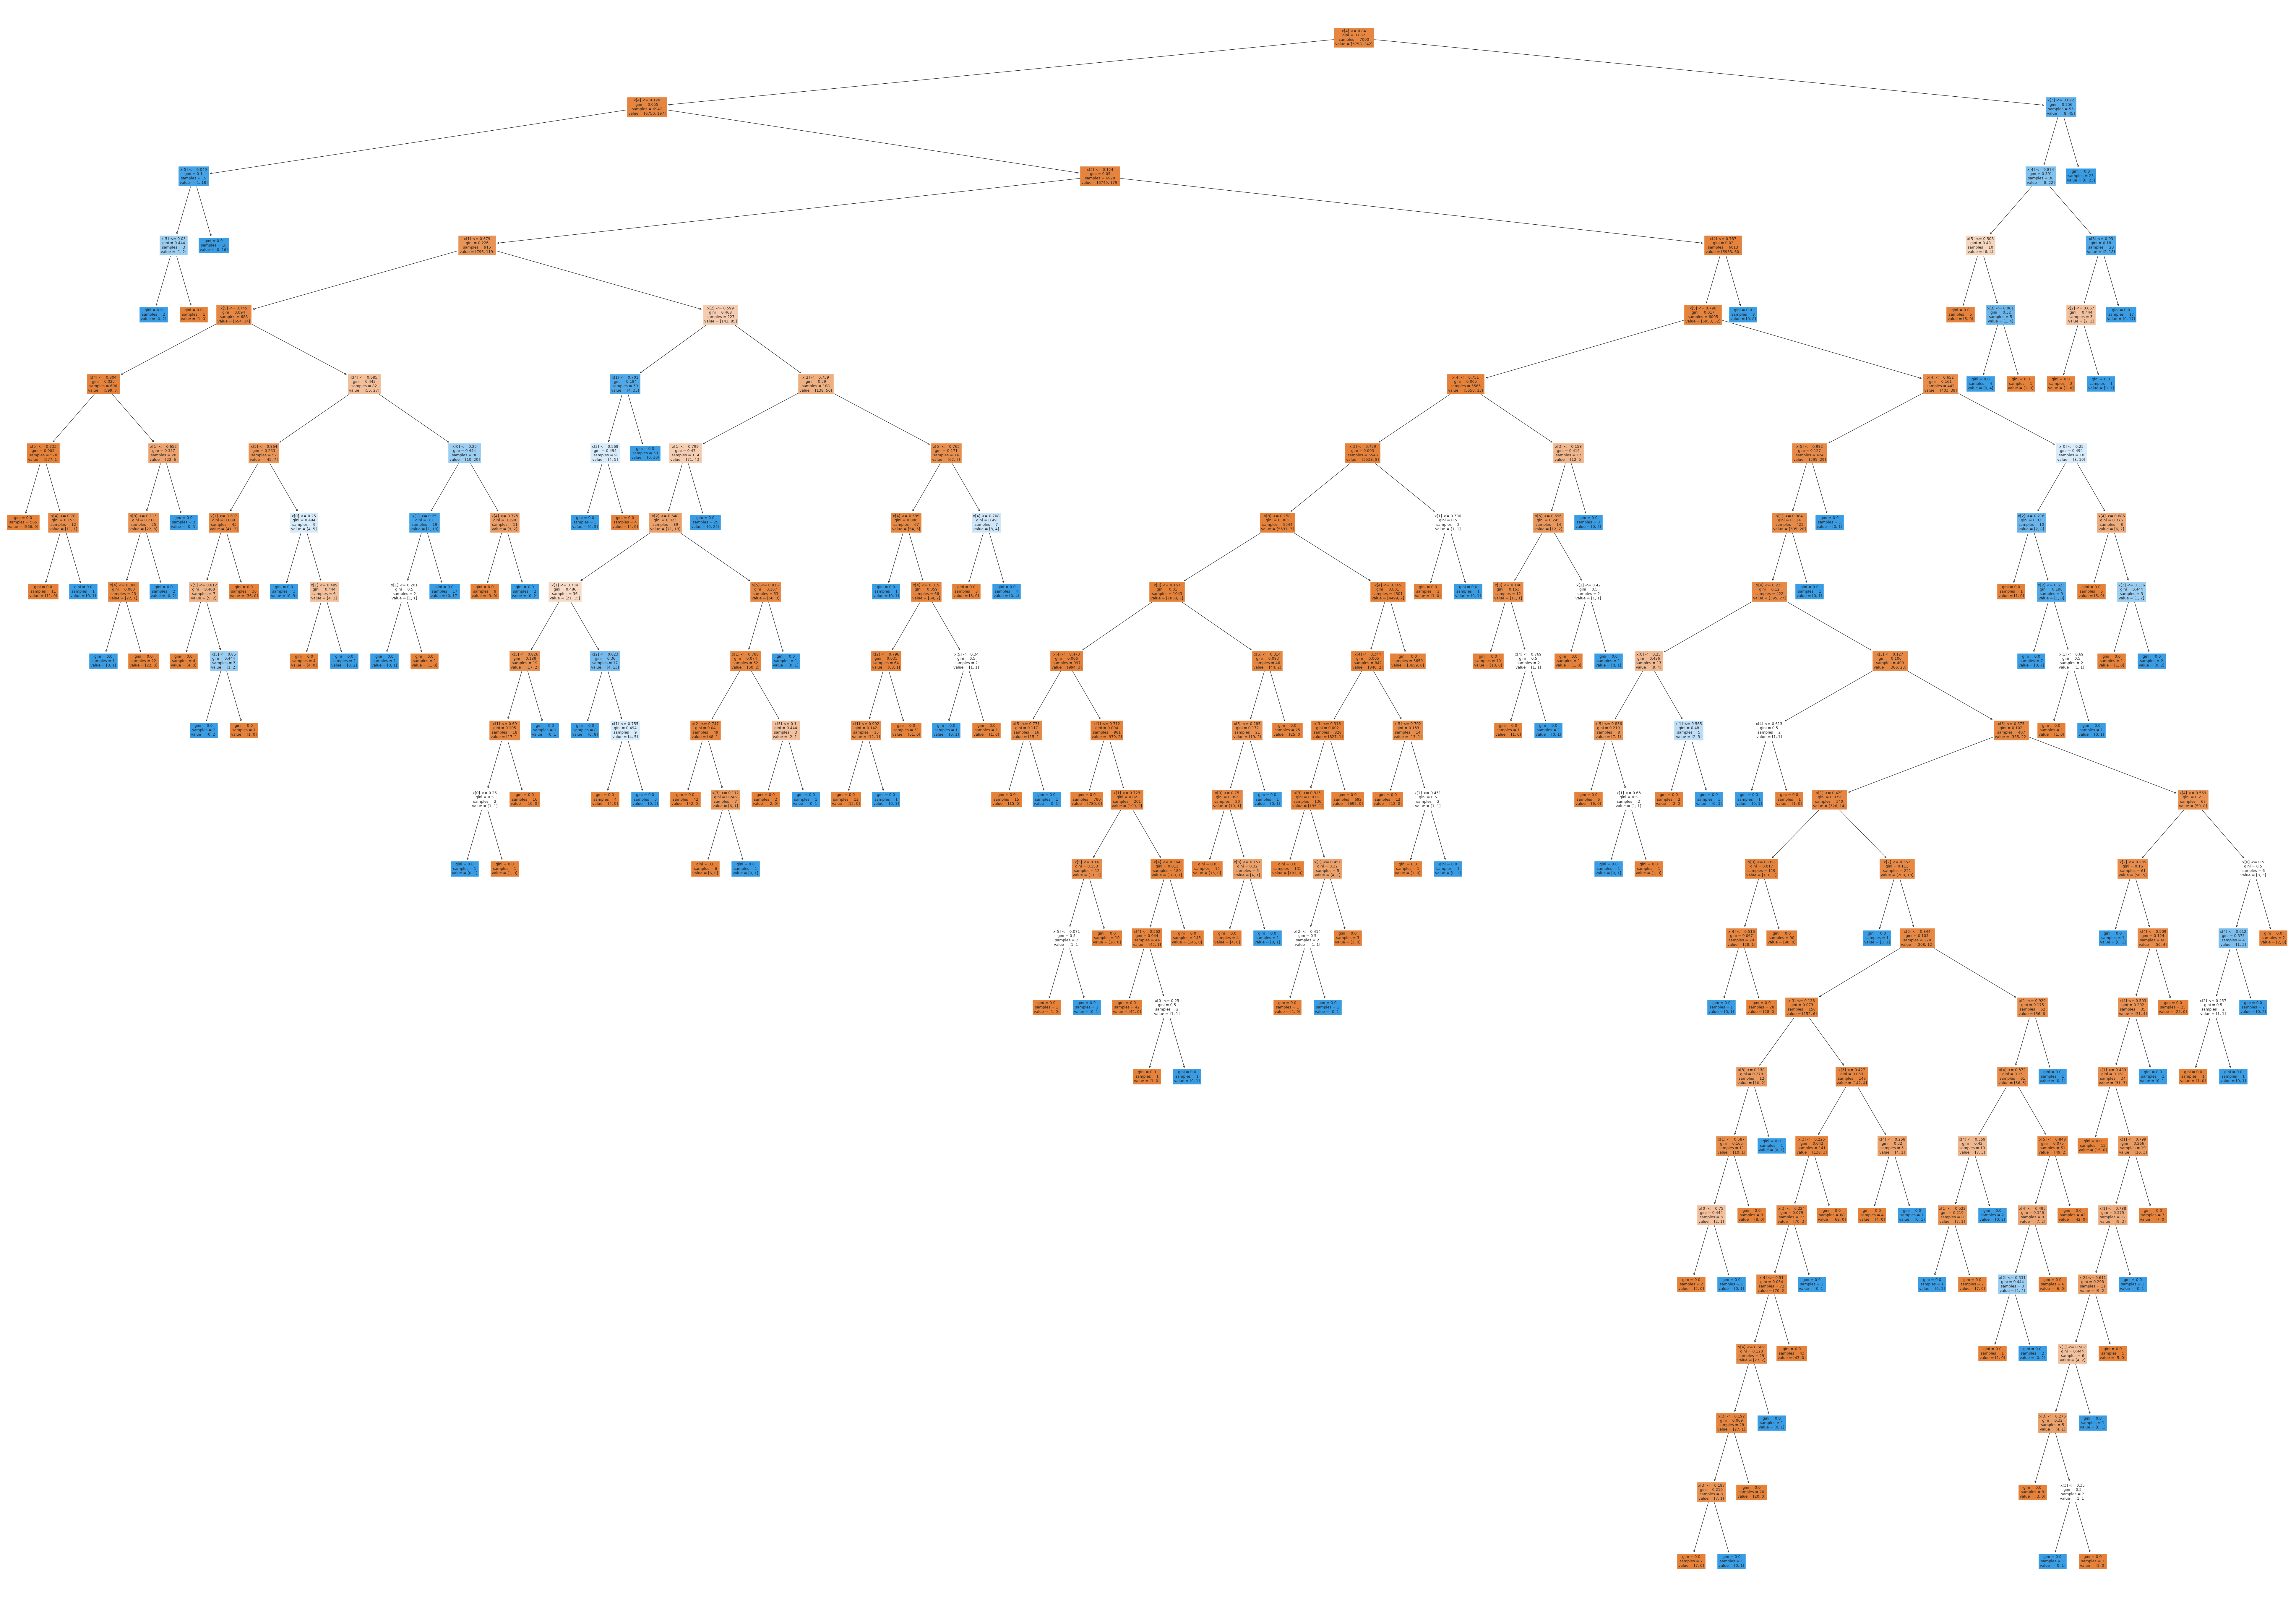

In [ ]:
fig = plt.figure(figsize=(100,70))
_ = tree.plot_tree(decision,
                   filled=True)

In [ ]:
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.13 %
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2903
         1.0       0.71      0.72      0.71        97

    accuracy                           0.98      3000
   macro avg       0.85      0.86      0.85      3000
weighted avg       0.98      0.98      0.98      3000



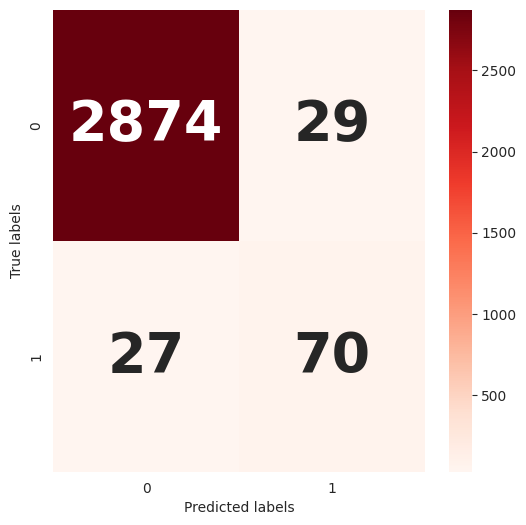

In [ ]:
cmn = confusion_matrix(y_test,y_pred_dec)
sns.heatmap(cmn, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 40, "weight": "bold"})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

Tuning and balancing model with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(X_train,y_train)
y_res.value_counts()

0.0    6758
1.0    6758
Name: Machine failure, dtype: int64

In [ ]:
x_tes,y_tes = sm.fit_resample(X_test,y_test)
y_tes.value_counts()

0.0    2903
1.0    2903
Name: Machine failure, dtype: int64

In [ ]:
decision0 = DecisionTreeClassifier()
decision0.fit(x_res, y_res)
y_pred_dec1 = decision0.predict(x_tes)

In [ ]:
decision_train1 = round(decision0.score(x_res, y_res) * 100, 2)
decision_accuracy1 = round(accuracy_score(y_pred_dec1, y_tes) * 100, 2)

In [ ]:
print("Training Accuracy    :",decision_train1 ,"%")
print("Model Accuracy Score :",decision_accuracy1 ,"%")
print("Classification_Report: \n",classification_report(y_tes,y_pred_dec1))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.41 %
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      2903
         1.0       0.96      0.80      0.87      2903

    accuracy                           0.88      5806
   macro avg       0.90      0.88      0.88      5806
weighted avg       0.90      0.88      0.88      5806



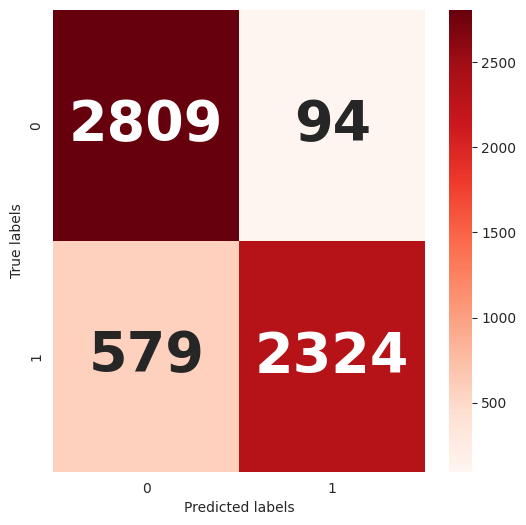

In [ ]:
cm0 = confusion_matrix(y_tes,y_pred_dec1)
sns.heatmap(cm0, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 40, "weight": "bold"})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
new_df = {}
k1 = 'Type'
v1 = float(input("Type"))
k2 = 'Air temperature [K]'
v2 = float(input("Air temperature [K]"))
k3 = 'Process temperature [K]'
v3 = float(input("Process temperature [K]"))
k4 = 'Rotational speed [rpm]'
v4 = float(input("Rotational speed [rpm]"))
k5 = 'Torque [Nm]'
v5 = float(input("Torque [Nm]"))
k6 = 'Tool wear [min]'
v6 = float(input('Tool wear [min]'))

new_df.update({k1:v1})
new_df.update({k2:v2})
new_df.update({k3:v3})
new_df.update({k4:v4})
new_df.update({k5:v5})
new_df.update({k6:v6})
x = pd.DataFrame(new_df,index=[0])
x

Type2
Air temperature [K]300.1
Process temperature [K]1378.0
Rotational speed [rpm]50.4
Torque [Nm]220.0
Tool wear [min]87.0


Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   2.0                300.1                   1378.0                    50.4   

   Torque [Nm]  Tool wear [min]  
0        220.0             87.0

In [ ]:
print(decision0.predict(x))

[0.]


In [ ]:
#test_cases
#input                                       results
#2	300.1	311.4	1518.0	46.9	87.0     0
#0	299.2	308.5	1378.0	50.4	220.0    1

fitting the model with ADASYN oversampling

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X1,Y1 = ada.fit_resample(X_train,y_train)   #resampling train data using adasyn
x2_tes,y2_tes = ada.fit_resample(X_test,y_test)  #resapling test data using adasyn
print(Y1.value_counts())
print(y2_tes.value_counts())

0.0    6758
1.0    6714
Name: Machine failure, dtype: int64
1.0    2909
0.0    2903
Name: Machine failure, dtype: int64


In [ ]:
decision2 = DecisionTreeClassifier()
decision2.fit(X1, Y1)
y_pred_dec2 = decision2.predict(x2_tes)

In [ ]:
decision_train2 = round(decision2.score(X1, Y1) * 100, 2)
decision_accuracy2 = round(accuracy_score(y_pred_dec2, y2_tes) * 100, 2)

In [ ]:
print("Training Accuracy    :",decision_train2 ,"%")
print("Model Accuracy Score :",decision_accuracy2 ,"%")

Training Accuracy    : 100.0 %
Model Accuracy Score : 86.08 %


In [ ]:
print("Classification_Report: \n",classification_report(y2_tes,y_pred_dec2))

Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      2903
         1.0       0.95      0.76      0.85      2909

    accuracy                           0.86      5812
   macro avg       0.87      0.86      0.86      5812
weighted avg       0.87      0.86      0.86      5812



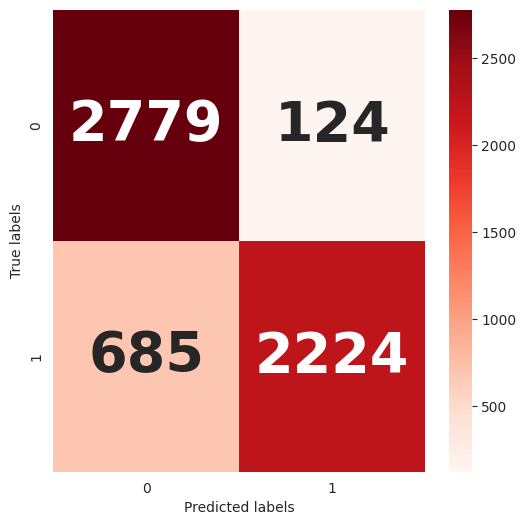

In [ ]:
cm1 = confusion_matrix(y2_tes,y_pred_dec2)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 40, "weight": "bold"})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
print(decision2.predict(x))

[1.]


In [ ]:
print(decision.predict(x))  #without balancing
print(decision0.predict(x))  #with SMOTE
print(decision2.predict(x))   #with ADASYN

[1.]
[0.]
[1.]


Roc score without and with sampling for DT models

In [ ]:
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_pred_dec),4)}')  #without balancing
print(f'ROC AUC score: {round(roc_auc_score(y_tes, y_pred_dec1),4)}')  #with SMOTE
print(f'ROC AUC score: {round(roc_auc_score(y2_tes, y_pred_dec2),4)}')  #with ADASYN

ROC AUC score: 0.8558
ROC AUC score: 0.8841
ROC AUC score: 0.8609


ROC curve


random forest classfier using adasyn oversamling technique


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
rfc = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy')
grid_search.fit(X1,Y1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'precision': 'precision',
                      'recall': 'recall'})

In [ ]:
best_rfc = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_rfc.fit(X1,Y1)

RandomForestClassifier(max_depth=15, n_estimators=150, random_state=42)

In [ ]:
rfc_pred = best_rfc.predict(x2_tes)

In [ ]:
rfc1 = round(best_rfc.score(X1, Y1) * 100, 2)
rft = round(accuracy_score(rfc_pred, y2_tes) * 100, 2)

In [ ]:
print("Training Accuracy    :",rfc1 ,"%")
print("Model Accuracy Score :",rft ,"%")

Training Accuracy    : 99.8 %
Model Accuracy Score : 88.63 %


In [ ]:
print("Classification_Report: \n",classification_report(y2_tes,rfc_pred))

Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      2903
         1.0       0.97      0.80      0.88      2909

    accuracy                           0.89      5812
   macro avg       0.90      0.89      0.89      5812
weighted avg       0.90      0.89      0.89      5812



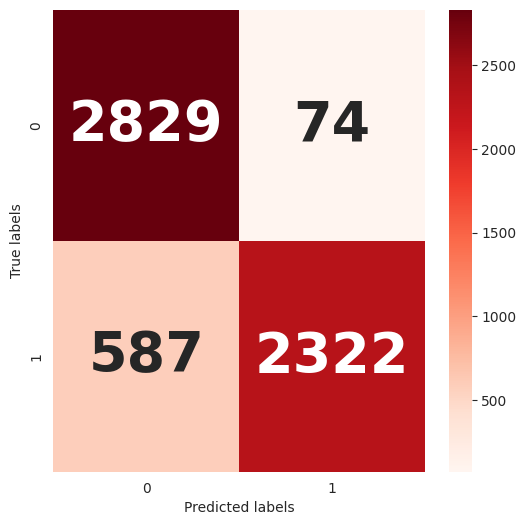

In [ ]:
cm = confusion_matrix(y2_tes,rfc_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 40, "weight": "bold"})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
print(f'ROC AUC score: {round(roc_auc_score(y2_tes, rfc_pred),4)}')  #roc score for random-forest using grid search classfier

ROC AUC score: 0.8864


In [ ]:
best_rfc.predict(x)

array([1.])

plotting accuracy graphs for different models


In [ ]:
import scikitplot as skplt